## LIP sin plus const Frozen Wave definition #

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

### Frozen Wave definition

In [2]:
L = 500e-6

z1 = -0.15*L
z2 = -0.025*L
z3 = +0.025*L
z4 = +0.15*L

def lip_sin_const_func(z):
    if z1 <= z and z <= z2:
        return math.sin(math.pi*(z - z2)/(z2 - z1))
    elif z3 <= z and z <= z4:
        return 1
    else: 
        return 0
    
vfw2 = VectorialFrozenWave(centered=True)
vfw2.vacuum_wavelength = 1064e-9
vfw2.medium_refractive_index = 1.33
vfw2.N = 15
vfw2.L = L
vfw2.Q = 0.975*vfw2.wavenumber
vfw2.reference_function = lip_sin_const_func

### 2D plot

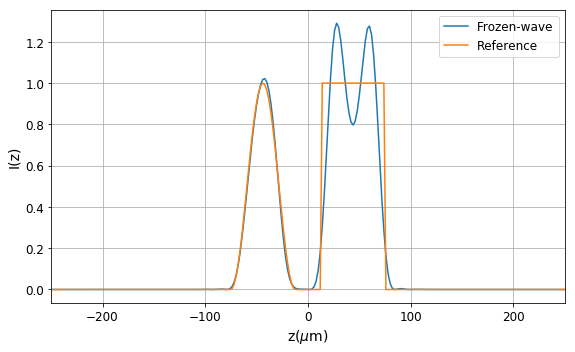

In [3]:
# LIPSIN Frozen Wave perfil plot
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

z = np.linspace(-L/2, L/2, 251)

plt.plot([z*1e6 for z in z], [vfw2.intensity(0, 0, z) for z in z], label='Frozen-wave')
plt.plot([z*1e6 for z in z], [vfw2.reference_function(z)**2 for z in z], label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e6, L/2*1e6])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z($\mu$m)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-perfil-2D.png')
plt.show()

### 3D plot

In [9]:
rho_max = 20e-6
z_max = L/2

rho = np.linspace(-rho_max, rho_max, 251)
z = np.linspace(-z_max, z_max, 251)
RHO, Z = np.meshgrid(rho, z)

vinty = np.vectorize(lambda rho, z: vfw2.intensity(rho, 0, z, 'cylindrical'))

INTY = vinty(RHO, Z)

RHO = [rho*1e6 for rho in RHO]
Z = [z*1e6 for z in Z]

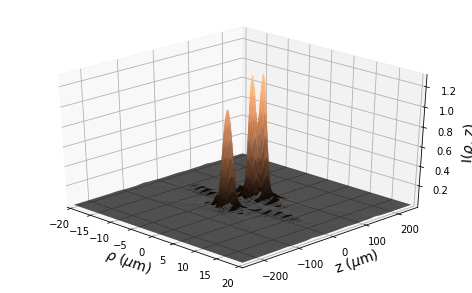

In [10]:
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))
ax = plt.gca(projection='3d')

# https://matplotlib.org/examples/color/colormaps_reference.html
ax.plot_surface(RHO, Z, INTY, rcount=1000, ccount=1000, alpha=1, cmap=cmplt.copper)
#cset = ax.contourf(RHO, Z, INTY, zdir='z', offset=0, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='x', offset=-Rmax, cmap=cmplt.coolwarm)
#cset = ax.contourf(RHO, Z, INTY, zdir='y', offset=Zmax, cmap=cmplt.coolwarm)

ax.set_xlabel(r'$\rho$ ($\mu$m)', fontsize=14)
ax.set_xlim(-rho_max*1e6, rho_max*1e6)
ax.set_ylabel(r'z ($\mu$m)', fontsize=14)
ax.set_ylim(-z_max*1e6, z_max*1e6)
ax.set_zlabel(r'I($\rho$, z)', fontsize=14)

ax.view_init(elev=30, azim=-45)

plt.savefig('LIP-sin-const-perfil-3D.png')
plt.show()

### FW energy flux plus particle

In [65]:
rho_minf = -50e-6
rho_maxf = +50e-6
z_minf = -250e-6
z_maxf = +250e-6

rho = np.linspace(rho_minf, rho_maxf, 99)
z = np.linspace(z_minf, z_maxf, 99)
RHOf, Zf = np.meshgrid(rho, z)

INTYf = vinty(RHOf, Zf)

RHOf = [rho*1e6 for rho in RHOf]
Zf = [z*1e6 for z in Zf]

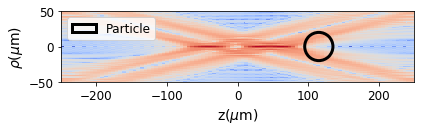

In [74]:
from matplotlib.patches import Ellipse

beam_z0 = -115

fig_num += 1
plt.figure(fig_num)

plt.pcolormesh(Zf, RHOf, [[math.log(val) for val in row] for row in INTYf], cmap=cmplt.coolwarm)

ax = plt.gca()

ellipse = Ellipse(xy=(-beam_z0, 0), width=40, height=40, edgecolor='k', fc='none', lw=3, label='Particle')

ax.add_patch(ellipse)

plt.axis('scaled')

plt.legend(fontsize=12, loc=0)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z($\mu$m)', fontsize=14)
plt.ylabel(r'$\rho$($\mu$m)', fontsize=14)
plt.tight_layout()
plt.savefig('LIP-sin-const-particle-position.png')

plt.show()

### Longitudinal force

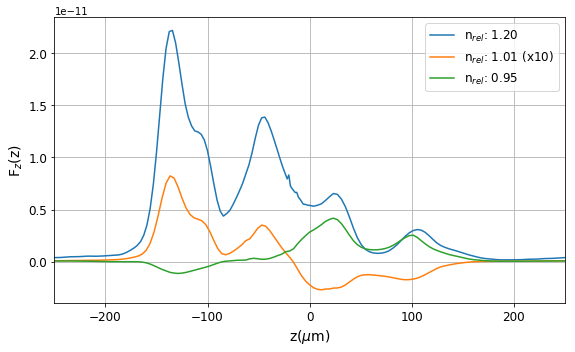

In [4]:
# LIPSIN Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -5*L/10,
          'stop': 5*L/10,
          'num': 120,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e6 for x in X1], [1*f for f in F1], label=label)

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot([x*1e6 for x in X2], [10*f for f in F2], label=label)

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot([x*1e6 for x in X3], [1*f for f in F3], label=label)

plt.xlim([-L*1e6/2, L*1e6/2])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z($\mu$m)', fontsize=14)
plt.ylabel(r'F$_z$(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-forces.png')

plt.show()

### 4 kind longitudinal forces. nrel = 1.2

In [8]:
ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -5*L/10,
          'stop': 5*L/10,
          'num': 30,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 1.2*1.33

X1, F1 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
plt.plot([x*1e6 for x in X1], [1*f for f in F1], label='Total')

X1I, F1I = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
plt.plot([x*1e6 for x in X1I], [1*f for f in F1I], label='Incident')

X1R, F1R = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e6 for x in X1R], [1*f for f in F1R], label='Reflection')

X1T, F1T = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e6 for x in X1T], [1*f for f in F1T], label='Transmission')

plt.xlim([-L*1e6/2, L*1e6/2])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z($\mu$m)', fontsize=14)
plt.ylabel(r'F$_z$(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-4kind-forces-nrel=1o2.png')

plt.show()


1/14
start: 17 Jul 2017 23:56:50


KeyboardInterrupt: 

### 4 kind longitudinal forces. nrel = 0.95

1/2
start: 18 Jul 2017 19:52:08
time: 22.3753502368927

2/2
start: 18 Jul 2017 19:52:31
time: 67.72987389564514



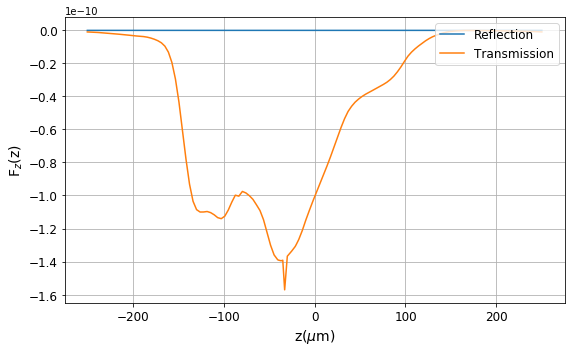

In [47]:
ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -250e-6,
          'stop': 250e-6,
          'num': 2,}
          
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

ptc.refractive_index = 0.95*1.33

#X3, F3 = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', paramx=paramx)
#plt.plot([x*1e6 for x in X3], [10*f for f in F3], label='Total')

#X3I, F3I = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='incident', paramx=paramx)
#plt.plot([x*1e6 for x in X3I], [1*f for f in F3I], label='Incident')

X3R, F3R = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='reflection', paramx=paramx)
plt.plot([x*1e6 for x in X3R], [1*f for f in F3R], label='Reflection')

X3T, F3T = ptc.geo_opt_force(vfw2, beam_pos, force_dir='fz', force_type='transmission', paramx=paramx)
plt.plot([x*1e6 for x in X3T], [1*f for f in F3T], label='Transmission')

#plt.xlim([-L*1e6/2, L*1e6/2])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z($\mu$m)', fontsize=14)
plt.ylabel(r'F$_z$(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-sin-const-longit-4kind-forces-nrel=0o95.png')

plt.show()


In [43]:
import pandas as pd

df = pd.read_pickle('database/spherical-particle_vectorial-frozen-wave_geo-opt.pkl')

df = df[(df['force_type'] == 'transmission') & (df['refractive_index'] == 1.264) & (df['beam_pos_z'] != -33e-6)]

df.to_pickle('database/spherical-particle_vectorial-frozen-wave_geo-opt.pkl')